## Creating a Distribution

This notebook is for experimentation with creating random data based off of a linear trend.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

In [2]:
%%capture
%run pearson_correlation.ipynb

Here, a random distribution of points is created, with the true relationship being y=2x+0 and the standard deviation being 50, for added noise.

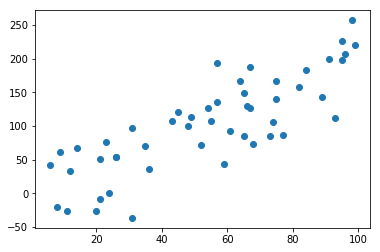

In [3]:
size = 50
slope = 2
intercept = 0
noise = np.random.normal(0, 50, size)
x = np.random.choice(range(1, 100), size, True)
y = slope * x + intercept + noise
plt.plot(x, y, "o")
plt.show()

In [86]:
def linear_distrib(m=0, b=0, sd=0, low=0, high=100, size=100, by=5, even=False, show=True):
    
    if even:
        x = np.arange(low, high+1, by)
        noise = np.random.normal(0, sd, len(x))
    else:
        noise = np.random.normal(0, sd, size)
        x = np.array(np.random.choice(range(low, high), size, True))
    
    y = np.array(m * x + b + noise)
    if show:
        plt.scatter(x, y)
        plt.show()

    dat = pd.DataFrame()
    dat = dat.assign(x=pd.Series(x))
    dat = dat.assign(y=pd.Series(y))
    return dat

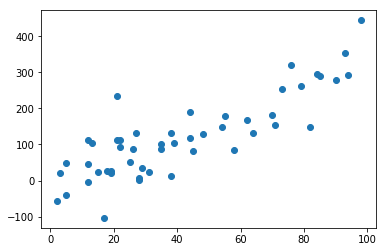

    x           y
0  28    6.691626
1  17 -103.628586
2  12  112.125881
3  13  103.459315
4  19   20.705491


In [5]:
dat = linear_distrib(3, 0, 50, 0, 100, size=50, show=True)
print(dat.head(5))

We can plot the same thing, but using the returned data frame

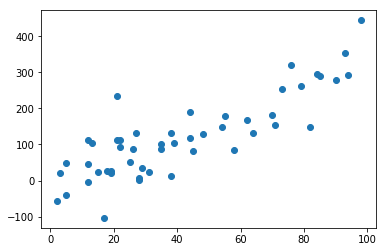

In [6]:
plt.scatter(dat['x'], dat['y'])
plt.show()

Here is the function to plot data with a linear regression line added, and a Pearson correlation R value returned. This code is from my `pearson_correlation.ipynb` notebook.

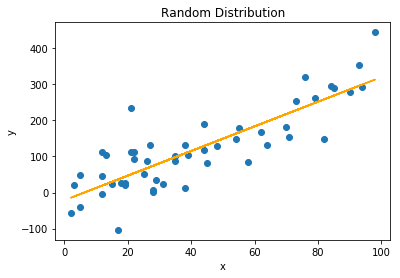

The R value is: 0.8409166769000874


In [7]:
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

Next, lets do the same, but with a smaller standard deviation. The R value should be closer to 1.

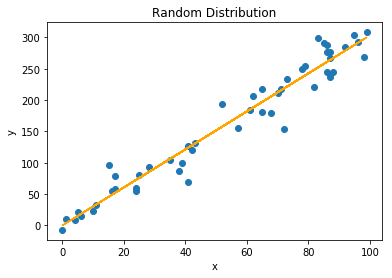

The R value is: 0.9736117886177649


In [8]:
dat = linear_distrib(3, 0, 25, 0, 100, size=50, show=False)
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

With a SD of 25 the R value of the Pearson correlation is a lot closer to 1.

So far the x value has been random within a specified range.
Next, lets have a set interval on the x axis.

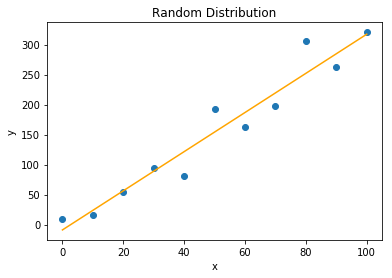

The R value is: 0.9675265052125596


In [9]:
dat = linear_distrib(3, 0, 25, 0, 100, by=10, show=False, even=True)
r = plot_pearson(dat, "x", "y", title="Random Distribution")
print("The R value is:", r)

I wanted to use this function to generate random sales data across a date range, but it turns out if two companies grow linearly, it's not a very significant market shre plot.

So here's a function that take an equation and evaluates.

In [87]:
def create_distrib(eq, sd=0, low=0, high=100, size=100, by=5, even=False, show=True):
    
    if even:
        x = np.arange(low, high+1, by)
        noise = np.random.normal(0, sd, len(x))
    else:
        noise = np.random.normal(0, sd, size)
        x = np.array(np.random.choice(range(low, high), size, True))
    
    y = np.array(eval(eq) + noise)
    if show:
        plt.scatter(x, y)
        plt.show()

    dat = pd.DataFrame()
    dat = dat.assign(x=pd.Series(x))
    dat = dat.assign(y=pd.Series(y))
    return dat

With this function lets create a few different distributions

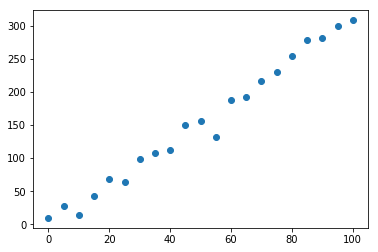

In [88]:
dat = create_distrib("3*x+5", sd=20, even=True)

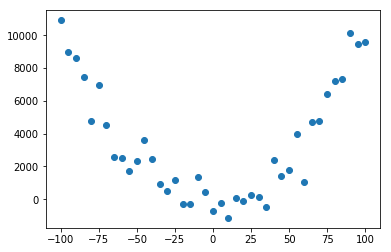

In [89]:
dat = create_distrib("x**2", sd=1000, low=-100, high=100, even=True)

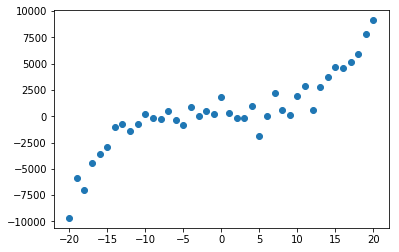

In [90]:
dat = create_distrib("x**3+500", sd=1000, low=-20, high=20, by=1, even=True)

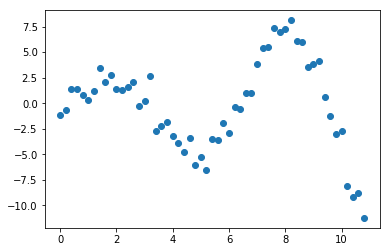

In [104]:
dat = create_distrib("np.sin(x)*x", sd=1, low=0, high=10, by=0.2, even=True)